In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import funs
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
pd.options.display.max_rows = 10
import numpy as np

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
periodo=3
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)
    nodosp[i] = nodosp[i].drop(columns=['HORA'])

In [22]:
raw=nodosp[5].copy()

In [23]:
from datetime import datetime,timedelta
nindex=pd.Timestamp('2018-06-08 18:39:00')+timedelta(days=60)

In [24]:
raw.loc[nindex] = raw.iloc[0]

In [25]:
raw=raw.asfreq('30T')
filtrado=raw.copy()
filtrar=raw.copy()

In [26]:
raw

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-06-05 10:21:00,22.81,27.0,5859.0,34.0
2018-06-05 10:51:00,14.14,26.0,5859.0,35.0
2018-06-05 11:21:00,12.85,27.0,5859.0,34.0
2018-06-05 11:51:00,12.69,26.0,5865.0,34.0
2018-06-05 12:21:00,13.34,25.0,5865.0,35.0
...,...,...,...,...
2018-08-07 16:21:00,NaN,NaN,NaN,NaN
2018-08-07 16:51:00,NaN,NaN,NaN,NaN
2018-08-07 17:21:00,NaN,NaN,NaN,NaN
2018-08-07 17:51:00,NaN,NaN,NaN,NaN


In [51]:
np.median(np.random.rand(i))*10

4.319063496122766

In [53]:
def filtro(filtrar,variable,i,q):
    'Iguala el valor de una medición a un determinado valor límite'
    
    try:
        
        d=len(filtrar[variable].iloc[0:i])/(60*24)
        val=[filtrar[variable][i-(60*24)*(1+j)] for j in range(int(d)) if d>1]
        val.append(filtrar[variable][i-1])
        filtrar[variable][i] = np.mean(val)+np.median(np.random.rand(i))*10

    except KeyError:
        filtrar[variable][i]= q
    return filtrar



def filtrar_variables(variable,lim_i,lim_s):
    'Ajusta los valores atípicos en las mediciones de la variable v'
    global filtrado
    Li, Ls = funs.tukey(filtrar[variable])

    for i in range(len(filtrar[variable])):
        if filtrar[variable][i] >= np.nan:
            funs.filtro(filtrado,variable,i,filtrado[variable].quantile(.75))
            
    plt.plot(filtrado.loc[:,variable],'blue',label='filtrar')
    plt.legend()
    return

KeyboardInterrupt: 

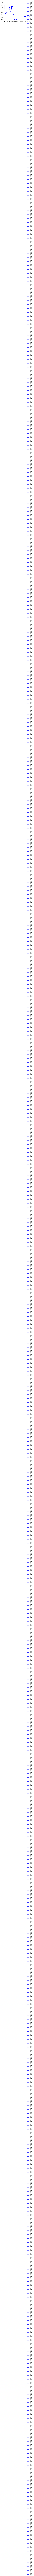

In [54]:
for variable in raw:
    lim_i,lim_s = funs.tukey(raw[variable])
    for i in range(len(raw)):
        filtrar_variables(variable,lim_i,lim_s)

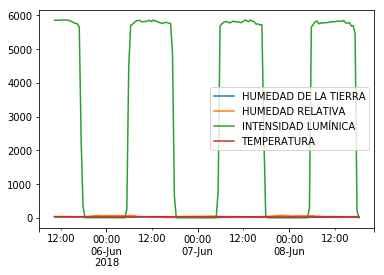

In [56]:
probar primero con un día, haciendo x=prom(días+rand(minutos))

In [ ]:

raw = pd.read_csv('nodo%d_periodo%d.csv'%(2,2),
                  parse_dates=True,index_col=0)


In [ ]:
a=raw['TEMPERATURA'].rolling(2000).std()
b=raw['HUMEDAD RELATIVA'].rolling(2000).std()
s=raw['HUMEDAD RELATIVA'].std()
#hacemos la desviación esandar, y escogemos un tamaño de muestra anterior con una desviacón estandar cercana
for i in range(len(raw)-i):
    val= [raw.TEMPERATURA[i-x:i].std for x in range(len(raw)) if raw.TEMPERATURA[i-x:i].std() < s]
    if len(val)>0:
        break

In [ ]:
from datetime import datetime, timedelta
# calcula el rango d tukey

nob=raw.copy()
li,ls=funs.tukey(raw['TEMPERATURA'])
display(li,ls)
indice=[x for x in raw.TEMPERATURA.index
   if raw.TEMPERATURA.loc[x]<li or raw.TEMPERATURA.loc[x]>ls]
#tenemos el indice y los valores atípicos
b=[x-timedelta(days=1) for x in indice]


nob.TEMPERATURA.loc[indice]=raw.TEMPERATURA.loc[b].values
#plt.plot(raw.TEMPERATURA.loc[indice])
#plt.plot(raw.TEMPERATURA.loc[b])
#plt.plot(raw.TEMPERATURA)
plt.plot(nob.TEMPERATURA)
#plt.plot(raw.TEMPERATURA.loc[b])
nob.TEMPERATURA.isnull().any()

In [ ]:
a=pd.DataFrame({'v':[1,2,3,4]})
a.loc[[2,3]]=a.loc[[1,0]].values
a

In [ ]:
filtrado=tablas[2]
li1,ls1 = funs.tukey(filtrado.TEMPERATURA)
print(li1,ls1)
li2,ls2 = funs.tukey(ajustado['HUMEDAD RELATIVA'])
a = ajustado.loc[:,['TEMPERATURA', 'HUMEDAD RELATIVA']].copy()
ind = [[x,a.TEMPERATURA.loc[x]] for x in list(a.TEMPERATURA.index)
       if 30 >= a.TEMPERATURA.loc[x]]
a.loc[pd.DataFrame(ind).iloc[:,0],'outlier'] = pd.DataFrame(ind).iloc[:,1].values
plt.plot(filtrado.TEMPERATURA)
plt.plot(a.outlier)
#Revisar que tipos de valores son 

In [ ]:
a=tablas[2].rolling(20).median()
plt.figure(figsize=[20,10])
plt.plot(tablas[2].TEMPERATURA)
plt.plot(a.TEMPERATURA)
a

In [ ]:
t = 24*60
nodo, periodos = {}, {}
for i in [2,3,4,5,6,8]:
    nodo[i], periodos[i] = funs.separa_datos(tablas[i],t)

In [ ]:
separados = nodo[2][1]
inicio = nodo[2][1].index[0]
fin = nodo[2][1].index[-1]
periodos

In [ ]:
nodo[2][1].TEMPERATURA.plot()

In [ ]:
tablas[2]

In [ ]:
.TEMPERATURA[[1,3,5,2]]=40

In [ ]:
tablas[2].TEMPERATURA[300]

def info_periodo(dataset,inicio,fin):
    registros = len(dataset.loc[inicio:fin,:])+1
    inicio = pd.Timestamp(inicio)
    fin = pd.Timestamp(fin)
    tiempo = fin - inicio
    
    faltantes = funs.transcurrido_fechas(fin, inicio) + 1 - registros
    r_registros = registros / (funs.transcurrido_fechas(fin, inicio) +1)
    n_registros = faltantes / (funs.transcurrido_fechas(fin, inicio) +1)
    info = pd.DataFrame({'Inicio': [inicio], 'Fin': [fin],
                             'Registrado': [registros], 'No Registrado':[faltantes],
                             '% Registrado':[r_registros],'% No Registrado':[n_registros],
                             'Duración':[tiempo]})
    return info

In [ ]:
from time import time
import numpy as np
start_time = time()
a=[]
for i in range(int(1e5)):
    a.append(i)
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

In [ ]:
start_time = time()
a = [i for i in range(int(1e7))]
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
start_time = time()
a = {i for i in range(int(1e7))}
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
start_time = time()
a = np.arange(1e7)
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
a=np.arange(40)
b = {i for i in a if i>30}
b